In [15]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model, metrics, tree
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

column_names = [
    'age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 
    'alkphos', 'sgpt', 'sgot', 'tot_proteins', 
    'albumin', 'ag_ratio', 'is_patient'
]

df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv', names=column_names, header=0)
df = df.sample(frac = 1)
df.head(50)

,age,gender,tot_bilirubin,direct_bilirubin,alkphos,sgpt,sgot,tot_proteins,albumin,ag_ratio,is_patient
556,51,Male,0.7,0.1,180,25,27,6.1,3.1,1.00,1
500,70,Male,2.7,1.2,365,62,55,6.0,2.4,0.60,1
14,61,Male,0.7,0.2,145,53,41,5.8,2.7,0.87,1
391,75,Male,0.9,0.2,162,25,20,6.9,3.7,1.10,1
347,38,Male,0.7,0.2,216,349,105,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
74,68,Male,0.7,0.1,145,20,22,5.8,2.9,1.00,1
83,33,Male,2.0,1.0,258,194,152,5.4,3.0,1.25,1
211,42,Male,2.7,1.3,219,60,180,7.0,3.2,0.80,1
536,46,Male,15.8,7.2,227,67,220,6.9,2.6,0.60,1


In [16]:
df['ag_ratio'] = df['ag_ratio'].fillna(df['ag_ratio'].mean()) #replace Nan with the mean value
df

,age,gender,tot_bilirubin,direct_bilirubin,alkphos,sgpt,sgot,tot_proteins,albumin,ag_ratio,is_patient
556,51,Male,0.7,0.1,180,25,27,6.1,3.1,1.00,1
500,70,Male,2.7,1.2,365,62,55,6.0,2.4,0.60,1
14,61,Male,0.7,0.2,145,53,41,5.8,2.7,0.87,1
391,75,Male,0.9,0.2,162,25,20,6.9,3.7,1.10,1
347,38,Male,0.7,0.2,216,349,105,7.0,3.5,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...
59,64,Male,1.1,0.5,145,20,24,5.5,3.2,1.39,2
338,75,Male,1.8,0.8,405,79,50,6.1,2.9,0.90,1
287,43,Male,1.3,0.6,155,15,20,8.0,4.0,1.00,2
309,48,Female,1.1,0.7,527,178,250,8.0,4.2,1.10,1


In [17]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0}) #data vectorization
df['is_patient'] = df['is_patient'].map({1: 1, 2: 0}) 
df

,age,gender,tot_bilirubin,direct_bilirubin,alkphos,sgpt,sgot,tot_proteins,albumin,ag_ratio,is_patient
556,51,1,0.7,0.1,180,25,27,6.1,3.1,1.00,1
500,70,1,2.7,1.2,365,62,55,6.0,2.4,0.60,1
14,61,1,0.7,0.2,145,53,41,5.8,2.7,0.87,1
391,75,1,0.9,0.2,162,25,20,6.9,3.7,1.10,1
347,38,1,0.7,0.2,216,349,105,7.0,3.5,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...
59,64,1,1.1,0.5,145,20,24,5.5,3.2,1.39,0
338,75,1,1.8,0.8,405,79,50,6.1,2.9,0.90,1
287,43,1,1.3,0.6,155,15,20,8.0,4.0,1.00,0
309,48,0,1.1,0.7,527,178,250,8.0,4.2,1.10,1


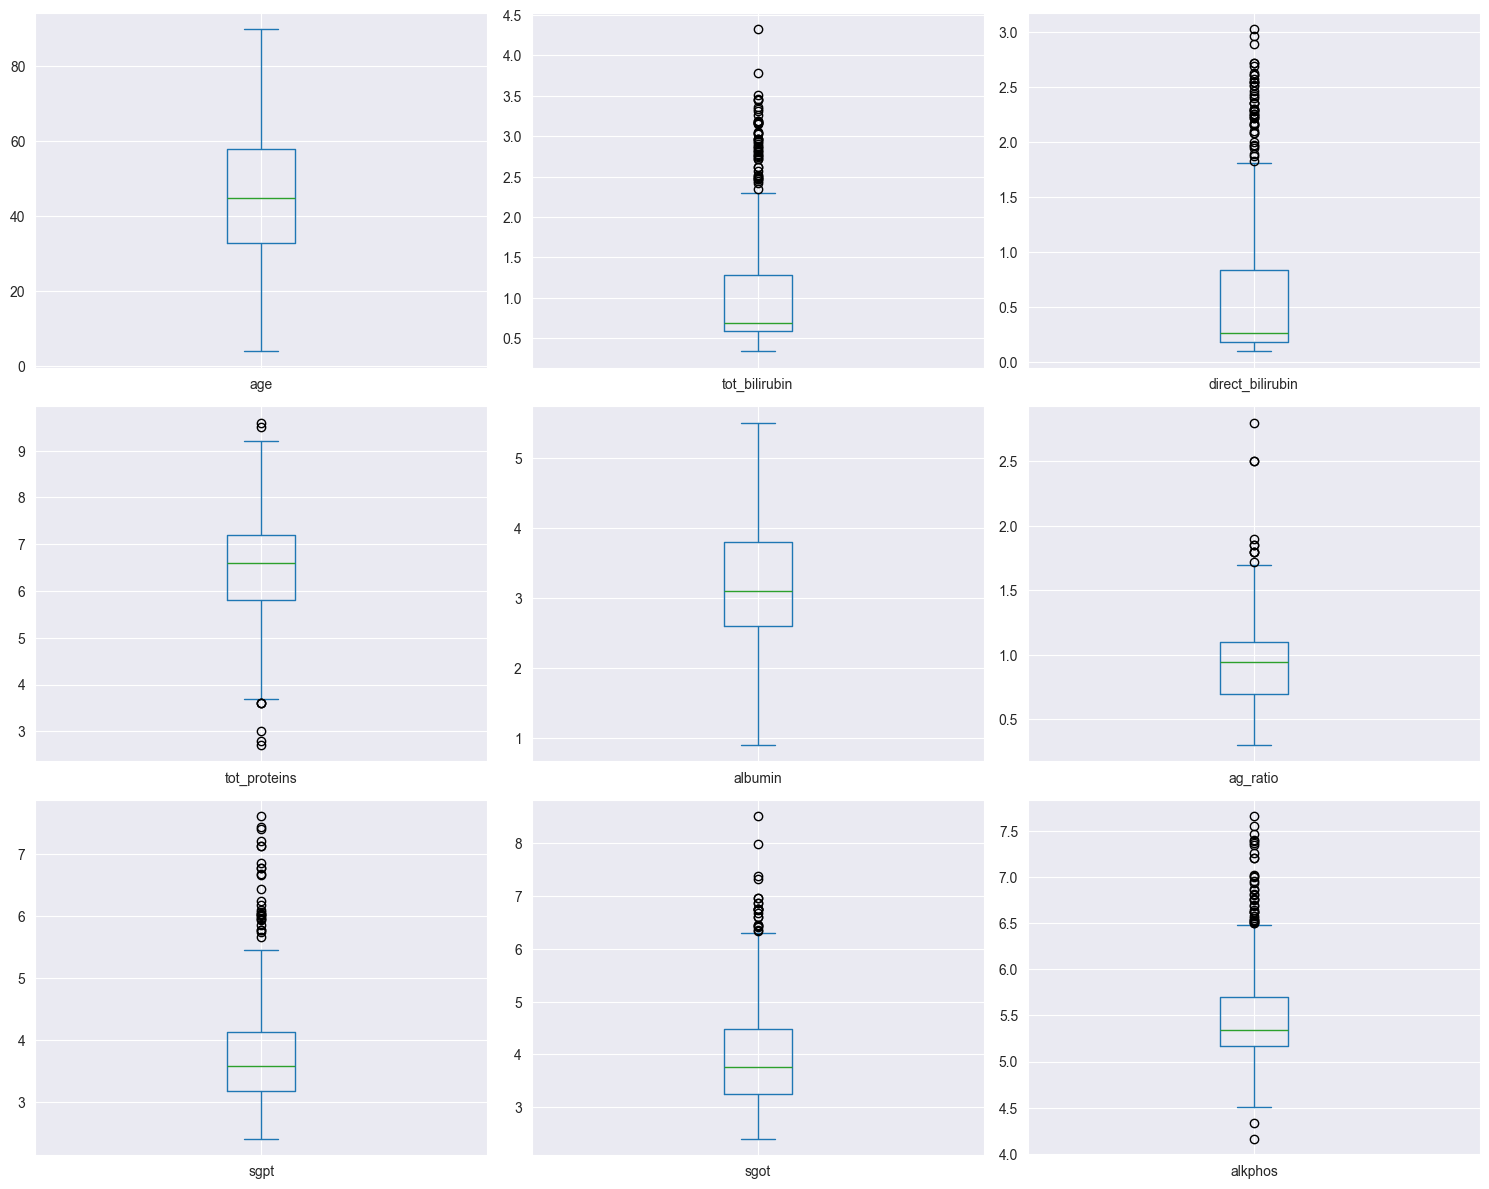

In [18]:
plot_df = df[['age', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins', 
        'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos']].copy()

cols_to_log = ['tot_bilirubin', 'direct_bilirubin', 'sgpt', 'sgot', 'alkphos']

for col in cols_to_log: #logarithmization
    plot_df[col] = np.log1p(plot_df[col])

plot_df.plot(
    kind='box', 
    subplots=True, 
    layout=(3,3),
    figsize=(15,12), 
    sharey=False,
)

plt.tight_layout()
plt.show()

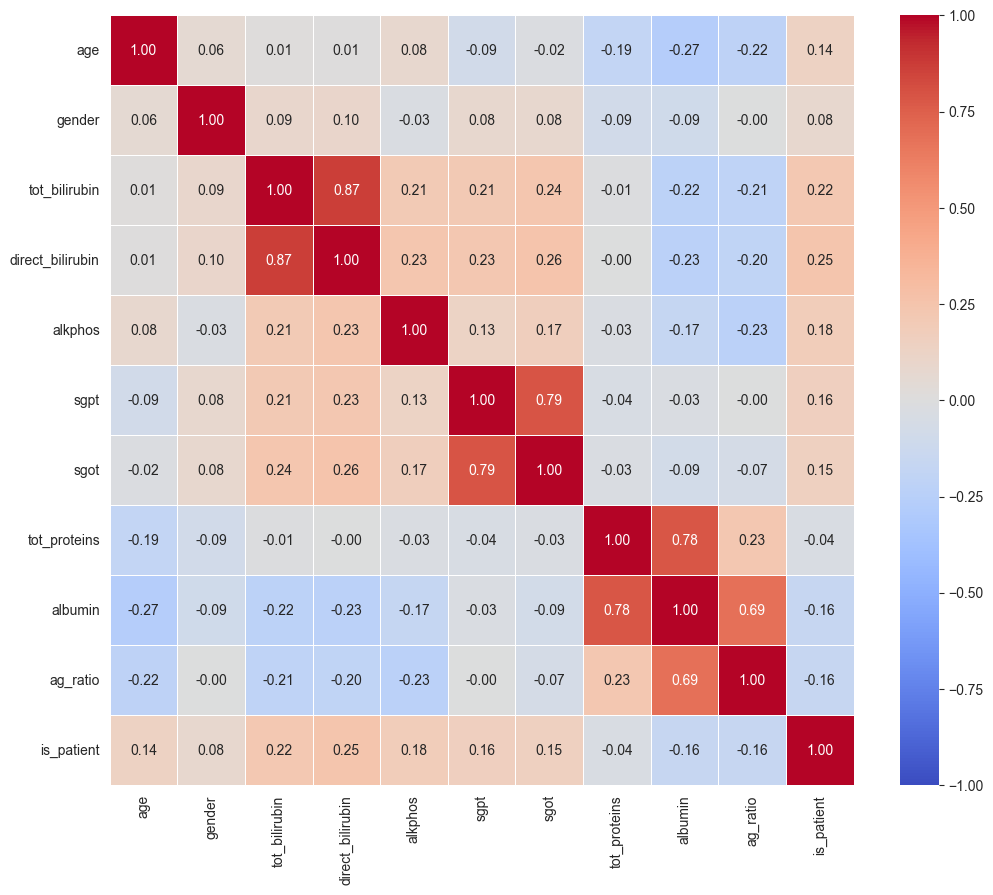

In [19]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,          
            fmt=".2f",           
            cmap='coolwarm',     
            linewidths=0.5,      
            vmin=-1, vmax=1,     
            center=0)            
plt.show()

In [20]:
# Separate features X and target variable Y
X = df.drop('is_patient', axis=1).to_numpy() 
Y = df.loc[:, 'is_patient'].to_numpy()

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3000)

In [22]:
def train_model(classifier, X_train, Y_train, X_test, Y_test):

    classifier.fit(X_train, Y_train)
    #save model
    with open('liver_model.pickle', 'wb') as handle:
        pickle.dump(classifier, handle)
    
    predictions = classifier.predict(X_test)
    #get results
    accuracy = accuracy_score(Y_test, predictions) # How often is the model right (guessing both healthy and sick people)?
    precision = precision_score(Y_test, predictions) # Of all the real patients, how many was the model able to identify?
    recall = recall_score(Y_test, predictions) # If the model said that a person is sick, what is the probability that this is true?
    f1 = f1_score(Y_test, predictions) # arithmetic mean between Precision and Recall.
    
    return predictions, [accuracy, precision, recall, f1]

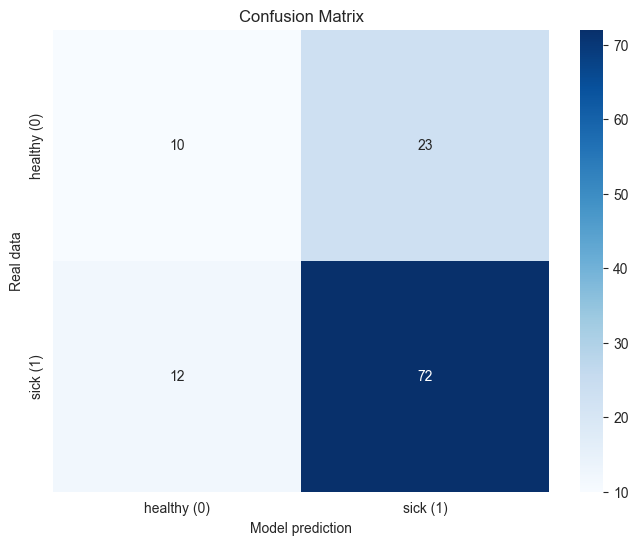

accuracy: 70.09

precision: 75.79

recall: 85.71

f1: 80.45


In [23]:
randomForestModel = RandomForestClassifier(
    n_estimators=300, 
    max_depth=None, 
    min_samples_split=2, 
    class_weight='balanced', 
    random_state=1450,
    n_jobs=1,
)

Y_pred, metrics_list = train_model(randomForestModel, X_train, Y_train, X_test, Y_test);

plt.figure(figsize=(8, 6))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['healthy (0)', 'sick (1)'], 
            yticklabels=['healthy (0)', 'sick (1)'])
plt.ylabel('Real data')
plt.xlabel('Model prediction')
plt.title('Confusion Matrix')
plt.show()

print(f"accuracy: {metrics_list[0]*100:.2f}\n")
print(f"precision: {metrics_list[1]*100:.2f}\n")
print(f"recall: {metrics_list[2]*100:.2f}\n")
print(f"f1: {metrics_list[3]*100:.2f}\n")

In [24]:
with open('liver_model.pickle', 'rb') as handle:
    loaded_model = pickle.load(handle)

print("The model has been successfully uploaded and is ready to work.")

The model has been successfully uploaded and is ready to work.


In [25]:
patient_A = [[55, 1, 4.5, 2.1, 560, 150, 200, 6.0, 2.5, 0.7]]
patient_B = [[25, 0, 0.8, 0.2, 150, 25, 20, 7.2, 4.0, 1.2]]

pred_A = loaded_model.predict(patient_A)
prob_A = loaded_model.predict_proba(patient_A)

pred_B = loaded_model.predict(patient_B)
prob_B = loaded_model.predict_proba(patient_B)

print(f"Patient A: {'Sick' if pred_A[0] == 1 else 'Healthy'} (Probability of health: {prob_A[0][0]*100:.1f}%)")
print(f"Patient B: {'Sick' if pred_B[0] == 1 else 'Healthy'} (Probability of health: {prob_B[0][0]*100:.1f}%)")

Patient A: Sick (Probability of health: 5.0%)
Patient B: Sick (Probability of health: 46.0%)
